In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error
from scipy.stats import truncnorm
from scipy.optimize import curve_fit

In [29]:
df = pd.read_csv('Feature_vector_full.csv')

(array([3.4780e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        2.5000e+01, 8.8000e+01, 1.5400e+02, 3.1600e+02, 4.7500e+02,
        6.1400e+02, 7.6300e+02, 8.4600e+02, 9.3200e+02, 1.0800e+03,
        1.1020e+03, 1.1360e+03, 1.0930e+03, 1.1890e+03, 1.1220e+03,
        1.2580e+03, 1.2050e+03, 1.2370e+03, 1.1460e+03, 1.0980e+03,
        1.0330e+03, 1.0510e+03, 1.0120e+03, 9.4700e+02, 9.4500e+02,
        8.8200e+02, 9.0500e+02, 8.7300e+02, 8.3000e+02, 8.1100e+02,
        7.5500e+02, 8.1900e+02, 7.1900e+02, 7.3000e+02, 7.2400e+02,
        5.8400e+02, 4.6700e+02, 2.6300e+02, 6.8000e+01, 1.5223e+04]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

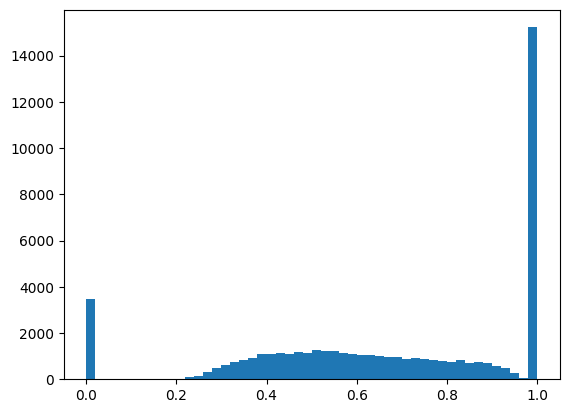

In [30]:
plt.hist(df['e1_by_e7_24'], bins = 50)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        4.000e+00, 1.500e+01, 3.300e+01, 8.700e+01, 2.210e+02, 4.040e+02,
        6.440e+02, 1.014e+03, 1.305e+03, 1.537e+03, 1.727e+03, 1.877e+03,
        2.171e+03, 2.290e+03, 2.631e+03, 2.852e+03, 3.004e+03, 3.174e+03,
        3.452e+03, 3.625e+03, 3.684e+03, 3.658e+03, 3.328e+03, 2.721e+03,
        1.980e+03, 1.250e+03, 6.970e+02, 3.250e+02, 1.420e+02, 8.400e+01,
        2.800e+01, 7.000e+00, 5.000e+00, 6.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 

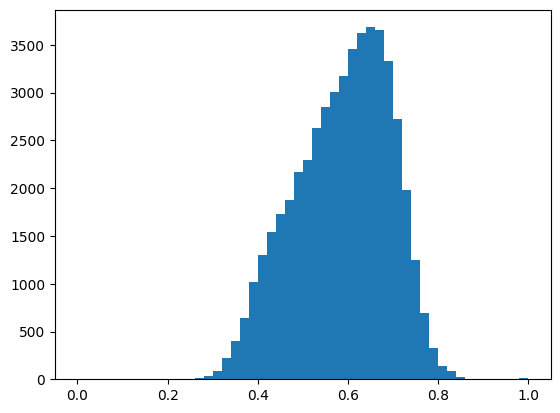

In [31]:
plt.hist(df['e1_by_e7_4'], bins = 50)

In [32]:
df.keys()

Index(['z_E_sum_layer_0', 'z_E_sum_layer_1', 'z_E_sum_layer_2',
       'z_E_sum_layer_3', 'z_E_sum_layer_4', 'z_E_sum_layer_5',
       'z_E_sum_layer_6', 'z_E_sum_layer_7', 'z_E_sum_layer_8',
       'z_E_sum_layer_9', 'z_E_sum_layer_10', 'z_E_sum_layer_11',
       'z_E_sum_layer_12', 'z_E_sum_layer_13', 'z_E_sum_layer_14',
       'z_E_sum_layer_15', 'z_E_sum_layer_16', 'z_E_sum_layer_17',
       'z_E_sum_layer_18', 'z_E_sum_layer_19', 'z_E_sum_layer_20',
       'z_E_sum_layer_21', 'z_E_sum_layer_22', 'z_E_sum_layer_23',
       'z_E_sum_layer_24', 'z_E_sum_layer_25', 'z_E_sum_layer_26',
       'z_E_sum_layer_27', 'e1_by_e7_0', 'e1_by_e7_1', 'e1_by_e7_2',
       'e1_by_e7_3', 'e1_by_e7_4', 'e1_by_e7_5', 'e1_by_e7_6', 'e1_by_e7_7',
       'e1_by_e7_8', 'e1_by_e7_9', 'e1_by_e7_10', 'e1_by_e7_11', 'e1_by_e7_12',
       'e1_by_e7_13', 'e1_by_e7_14', 'e1_by_e7_15', 'e1_by_e7_16',
       'e1_by_e7_17', 'e1_by_e7_18', 'e1_by_e7_19', 'e1_by_e7_20',
       'e1_by_e7_21', 'e1_by_e7_22', 'e1_by_e7_

In [33]:
X = df.drop(['target_energy'], axis=1)
y = df['target_energy']

In [34]:
X

,z_E_sum_layer_0,z_E_sum_layer_1,z_E_sum_layer_2,z_E_sum_layer_3,z_E_sum_layer_4,z_E_sum_layer_5,z_E_sum_layer_6,z_E_sum_layer_7,z_E_sum_layer_8,z_E_sum_layer_9,...,e7_over_e19_19,e7_over_e19_20,e7_over_e19_21,e7_over_e19_22,e7_over_e19_23,e7_over_e19_24,e7_over_e19_25,e7_over_e19_26,e7_over_e19_27,nhits
0,29.806881,116.785048,551.959116,867.931910,1394.833763,1434.385677,1998.590474,2083.453882,2828.288451,2199.648372,...,0.773913,0.682573,0.760595,0.392955,0.459872,0.858418,0.742760,0.854952,0.688523,1115.0
1,60.289388,154.114308,418.088728,486.282714,946.419755,1352.768847,1961.278227,2068.751030,2432.984322,2092.910957,...,0.798528,0.688918,0.759534,0.731525,0.684044,0.484239,0.874925,0.814594,1.000000,1048.0
2,40.690735,158.744283,338.596367,461.740181,868.336614,931.791397,1128.276636,1104.793859,1284.334015,943.772482,...,0.524284,0.896414,0.862544,0.871441,0.924071,1.000000,1.000000,1.000000,1.000000,684.0
3,21.497051,68.508469,193.359974,313.235154,513.012143,529.425181,639.027889,543.335632,663.683877,518.215865,...,0.815299,0.741621,1.000000,0.737998,0.783560,1.000000,1.000000,1.000000,0.000000,491.0
4,13.897627,23.198348,118.975507,278.665998,637.436678,810.794351,1246.932690,1321.134160,1475.480909,1817.616275,...,0.775570,0.651235,0.691890,0.482007,0.602296,0.856697,1.000000,0.842799,0.582839,1029.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,73.029604,218.699493,411.520828,696.791966,1237.581083,1171.036006,1813.522409,1609.198657,1570.637351,1361.209034,...,0.766712,1.000000,0.870278,0.737321,1.000000,1.000000,1.000000,1.000000,1.000000,823.0
49996,22.425785,136.472224,303.615554,697.544560,1174.102942,1377.982680,1608.406998,1532.716409,1418.067680,1332.328240,...,0.644550,0.713697,0.660679,0.886676,0.661775,0.667718,1.000000,1.000000,1.000000,807.0
49997,28.330245,92.980383,226.633529,496.374876,1012.439115,1477.062548,2032.124897,2230.429364,2463.827945,2233.701994,...,0.620419,0.723145,0.742892,0.802982,0.704382,0.730996,0.919785,0.580023,0.658799,1033.0
49998,83.627697,296.970925,659.868021,1083.444879,2233.141646,2510.163098,3049.503638,2919.541416,3485.699802,3016.810659,...,0.769956,0.611149,0.692183,0.659748,0.447164,0.678576,0.793604,0.828421,1.000000,1174.0


In [35]:
# X = df.drop(['target_energy'], axis=1)
# y = df['target_energy']

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 1: Split into temp (train+val) and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split temp into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [37]:
class SimpleDNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)  # First hidden layer
        self.fc2 = nn.Linear(64, 64)         # Second hidden layer
        self.out = nn.Linear(64, 1)          # Output layer for regression

    def forward(self, x):
        x = F.relu(self.fc1(x))  # First layer with ReLU
        x = F.relu(self.fc2(x))  # Second layer with ReLU
        x = self.out(x)          # Output (no activation for regression)
        return x

# class ComplexDNN(nn.Module):
#     def __init__(self, input_dim):
#         super(ComplexDNN, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 256)
#         self.fc2 = nn.Linear(256, 256)
#         self.fc3 = nn.Linear(256, 128)
#         self.fc4 = nn.Linear(128, 64)
#         self.out = nn.Linear(64, 1)
#         self.dropout = nn.Dropout(0.3)  # Optional dropout

#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = self.dropout(F.relu(self.fc2(x)))
#         x = F.relu(self.fc3(x))
#         x = F.relu(self.fc4(x))
#         x = self.out(x)
#         return x



In [38]:
# Example input dimension
input_dim = X_train.shape[1]  # if X_train is a NumPy array

# Create model
model = SimpleDNN(input_dim=input_dim)
# model = ComplexDNN(input_dim)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [39]:
# Convert DataFrame to tensor
X_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # shape [N, 1]

# Wrap into Dataset and DataLoader
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)



In [40]:
num_epochs = 50
model.train()

for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/50], Loss: 10.1809
Epoch [2/50], Loss: 16.8998
Epoch [3/50], Loss: 17.5398
Epoch [4/50], Loss: 9.7851
Epoch [5/50], Loss: 13.2661
Epoch [6/50], Loss: 9.1620
Epoch [7/50], Loss: 8.5181
Epoch [8/50], Loss: 13.5390
Epoch [9/50], Loss: 12.6223
Epoch [10/50], Loss: 7.7340
Epoch [11/50], Loss: 6.0154
Epoch [12/50], Loss: 11.2102
Epoch [13/50], Loss: 13.5792
Epoch [14/50], Loss: 7.0246
Epoch [15/50], Loss: 16.1489
Epoch [16/50], Loss: 17.8181
Epoch [17/50], Loss: 10.4999
Epoch [18/50], Loss: 6.5336
Epoch [19/50], Loss: 10.3455
Epoch [20/50], Loss: 12.7680
Epoch [21/50], Loss: 9.0863
Epoch [22/50], Loss: 9.0138
Epoch [23/50], Loss: 14.5177
Epoch [24/50], Loss: 15.9302
Epoch [25/50], Loss: 15.5203
Epoch [26/50], Loss: 8.9656
Epoch [27/50], Loss: 12.4730
Epoch [28/50], Loss: 12.0199
Epoch [29/50], Loss: 15.5154
Epoch [30/50], Loss: 11.7857
Epoch [31/50], Loss: 14.6045
Epoch [32/50], Loss: 22.0248
Epoch [33/50], Loss: 7.0761
Epoch [34/50], Loss: 12.6102
Epoch [35/50], Loss: 10.8702
Epoch

In [41]:
model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_pred = model(X_test_tensor).numpy()


In [42]:
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)


Test MSE: 10.131424743477899


In [43]:
# Ensure both are numpy arrays
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test
y_pred_np = y_pred  # already numpy from model output

# To avoid division by zero
epsilon = 1e-8
response = y_test_np.flatten() / (y_pred_np.flatten() + epsilon)


In [44]:
y_test_np/y_pred_np

array([[ 1.00958392,  0.06038871,  0.4235634 , ...,  1.30313649,
         1.47333353,  1.00438739],
       [16.01826056,  0.95813934,  6.7203417 , ..., 20.67582446,
        23.37620477, 15.93581132],
       [ 2.54350046,  0.1521406 ,  1.06710664, ...,  3.28306365,
         3.71185044,  2.53040854],
       ...,
       [ 0.77376129,  0.04628287,  0.32462577, ...,  0.99874468,
         1.12918642,  0.76977858],
       [ 0.68835462,  0.04117424,  0.28879404, ...,  0.88850467,
         1.00454843,  0.68481152],
       [ 1.0221718 ,  0.06114166,  0.42884455, ...,  1.31938449,
         1.49170362,  1.01691047]])

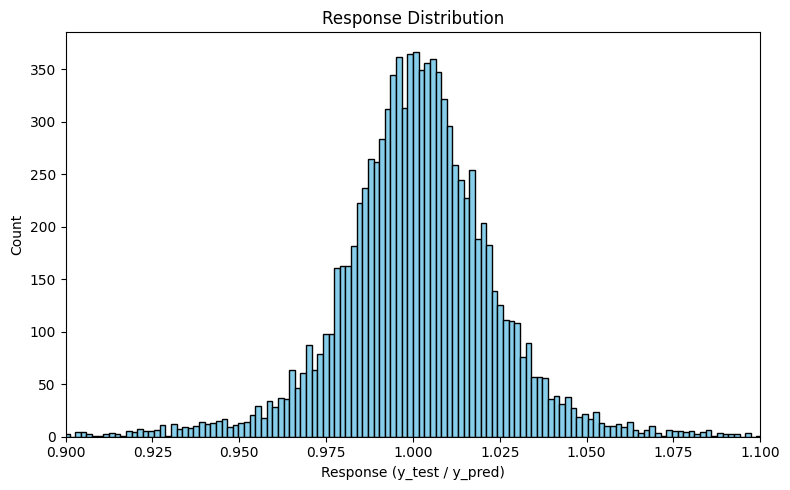

In [45]:
plt.figure(figsize=(8, 5))
plt.hist(response, bins=1000, color='skyblue', edgecolor='black')
plt.xlabel('Response (y_test / y_pred)')
plt.ylabel('Count')
plt.xlim(0.9, 1.1)
plt.title('Response Distribution')
plt.tight_layout()
plt.show()


In [46]:
epsilon = 1e-8
response = y_test_np.flatten() / (y_pred_np.flatten() + epsilon)

# Optionally: restrict to reasonable range (truncate manually)
response = response[(response > 0.9) & (response < 1.1)]  # or whatever makes sense


In [47]:
def truncated_gaussian(x, mu, sigma, a, b):
    # a and b are bounds in standard normal units
    a_scaled = (a - mu) / sigma
    b_scaled = (b - mu) / sigma
    return truncnorm.pdf(x, a_scaled, b_scaled, loc=mu, scale=sigma)


In [48]:
# Histogram
counts, bin_edges = np.histogram(response, bins=1000, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Fit
popt, _ = curve_fit(
    lambda x, mu, sigma: truncated_gaussian(x, mu, sigma, a=0.9, b=1.1),
    bin_centers, counts, p0=[1.0, 0.1]
)
mu_fit, sigma_fit = popt


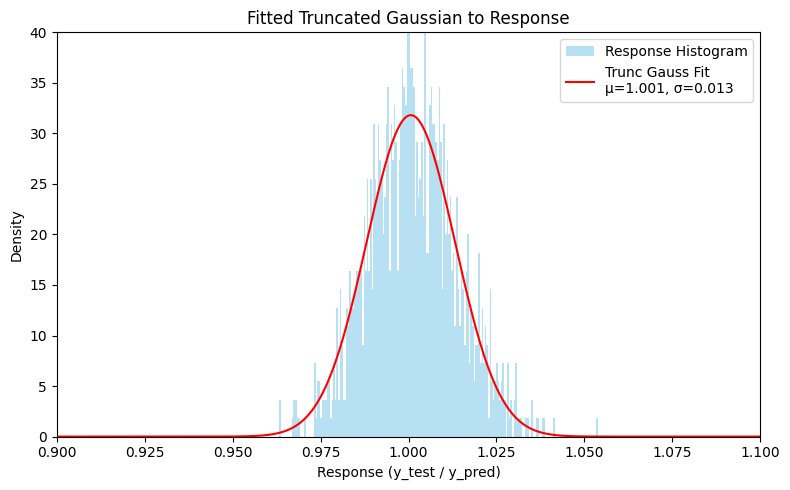

In [55]:
x_vals = np.linspace(0.9, 1.1, 1000)
pdf_vals = truncated_gaussian(x_vals, mu_fit, sigma_fit, a=0.5, b=1.5)

plt.figure(figsize=(8, 5))
plt.hist(response, bins=200, density=True, color='skyblue', alpha=0.6, label='Response Histogram')
plt.plot(x_vals, pdf_vals, 'r-', label=f'Trunc Gauss Fit\nμ={mu_fit:.3f}, σ={sigma_fit:.3f}')
plt.xlabel('Response (y_test / y_pred)')
plt.xlim(0.9, 1.1)
plt.ylim(0, 40)
plt.ylabel('Density')
plt.title('Fitted Truncated Gaussian to Response')
plt.legend()
plt.tight_layout()
plt.show()


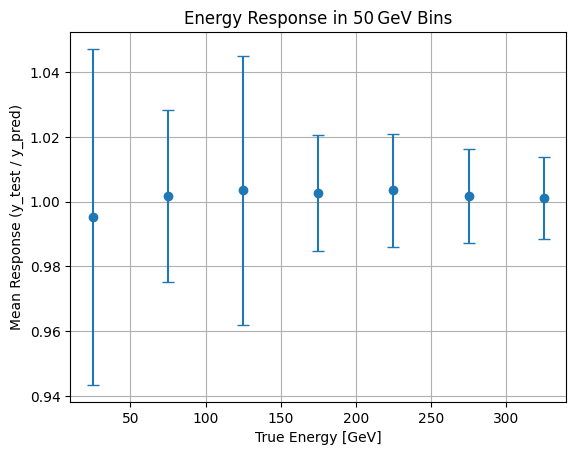

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure numpy arrays
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test
y_pred_np = y_pred  # assumed already numpy array

# Flatten
y_test_np = y_test_np.flatten()
y_pred_np = y_pred_np.flatten()

# Define bin edges (0 to max true energy, in 50 GeV steps)
bin_edges = np.arange(0, y_test_np.max() + 50, 50)

# Digitize returns bin index (1-based)
bin_indices = np.digitize(y_test_np, bin_edges)

# Prepare containers
response_bins = []
bin_centers = []

epsilon = 1e-8

for i in range(1, len(bin_edges)):
    # Get the indices (not boolean mask!) where y_test falls into current bin
    indices = np.where(bin_indices == i)[0]

    if len(indices) == 0:
        continue  # skip empty bin

    # Use indices to select corresponding y_test and y_pred
    y_test_bin = y_test_np[indices]
    y_pred_bin = y_pred_np[indices]

    # Compute response safely
    response = y_test_bin / (y_pred_bin + epsilon)

    response_bins.append(response)
    bin_centers.append((bin_edges[i - 1] + bin_edges[i]) / 2)

# Optional: plot mean ± std response in each bin
mean_response = [np.mean(r) for r in response_bins]
std_response = [np.std(r) for r in response_bins]

plt.errorbar(bin_centers, mean_response, yerr=std_response, fmt='o', capsize=4)
plt.xlabel('True Energy [GeV]')
plt.ylabel('Mean Response (y_test / y_pred)')
plt.title('Energy Response in 50 GeV Bins')
plt.grid(True)
plt.show()



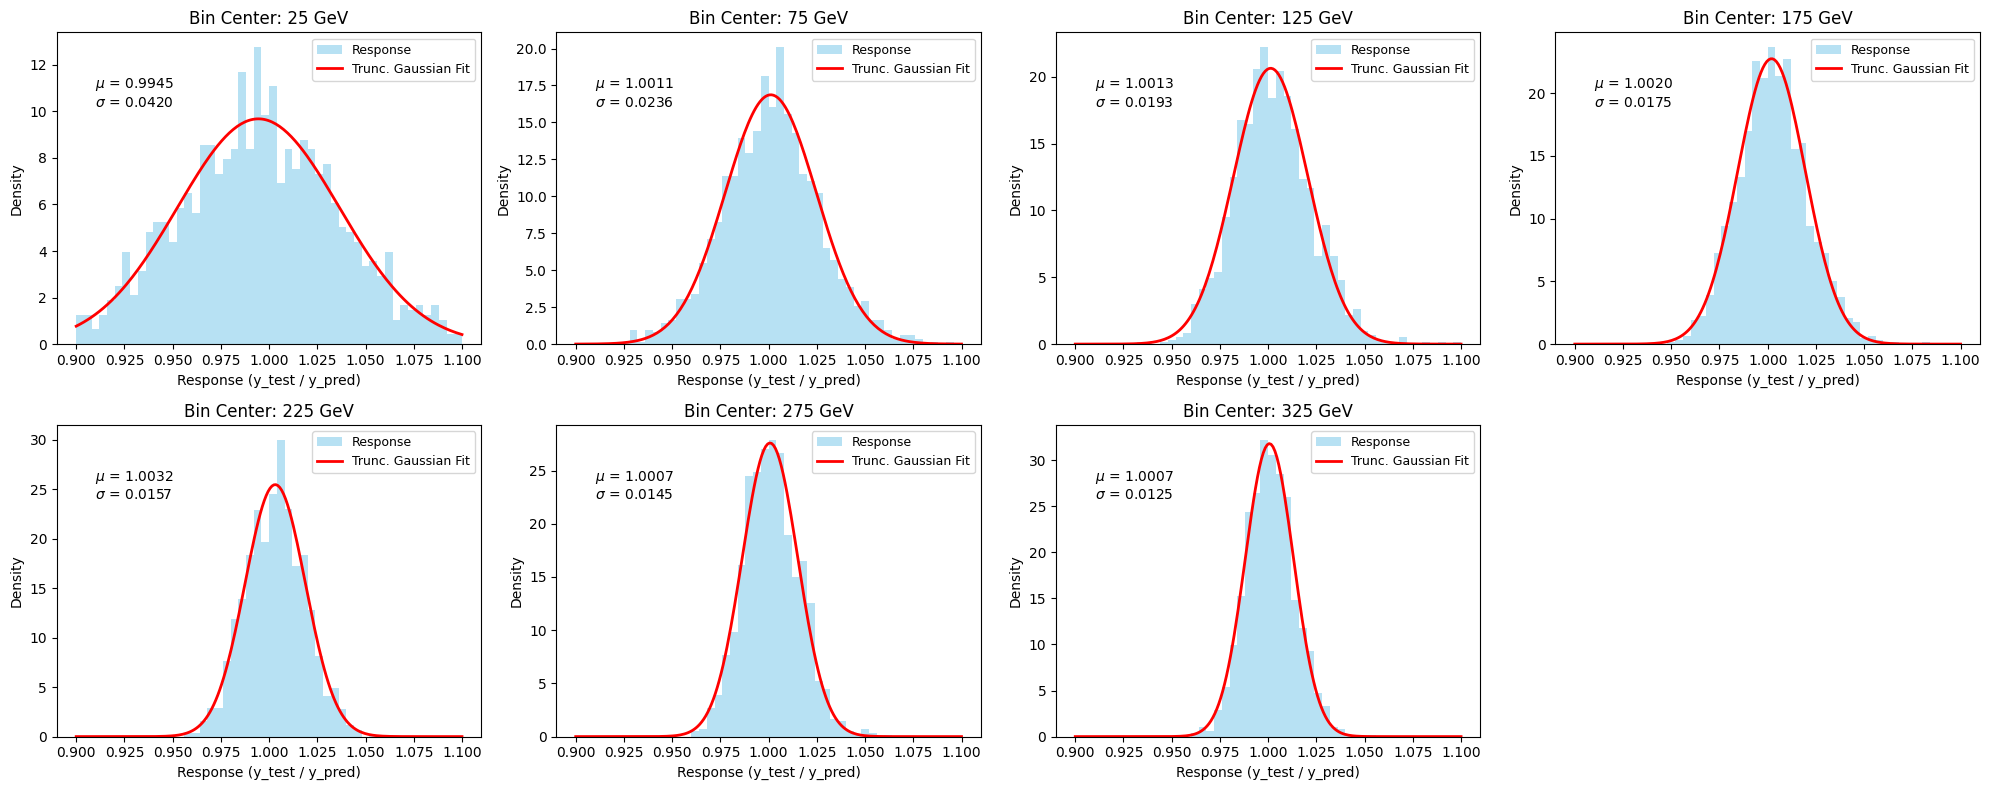

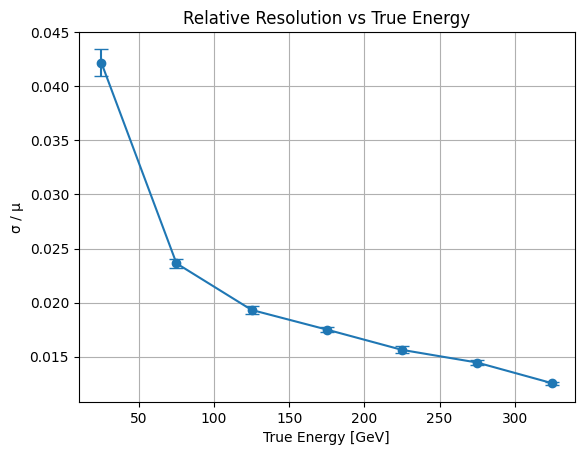

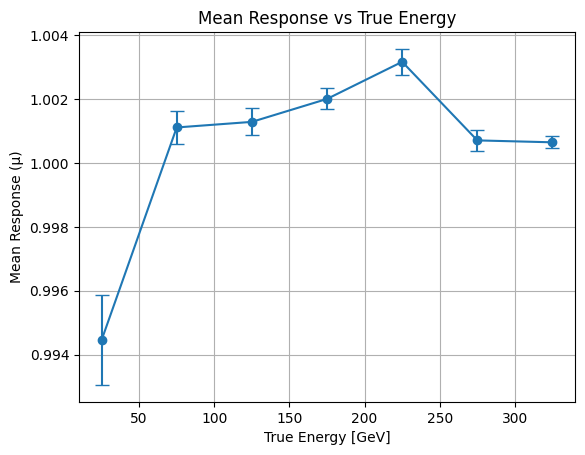

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from scipy.optimize import curve_fit

# Truncated Gaussian PDF
def truncated_gaussian(x, mu, sigma, a=0.9, b=1.1):
    a_, b_ = (a - mu) / sigma, (b - mu) / sigma
    return truncnorm.pdf(x, a_, b_, loc=mu, scale=sigma)

# Fit wrapper
def fit_func(x, mu, sigma):
    return truncated_gaussian(x, mu, sigma)

# Step 1: Prepare data
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test
y_pred_np = y_pred
y_test_np = y_test_np.flatten()
y_pred_np = y_pred_np.flatten()

# Step 2: Binning based on y_test
bin_edges = np.arange(0, y_test_np.max() + 50, 50)
bin_indices = np.digitize(y_test_np, bin_edges)

# Step 3: Containers
response_bins = []
bin_centers = []
mu_vals, sigma_vals, mu_errs, sigma_errs = [], [], [], []
epsilon = 1e-8

# Step 4: Fit truncated Gaussian per bin
for i in range(1, len(bin_edges)):
    indices = np.where(bin_indices == i)[0]
    if len(indices) < 10:
        continue

    y_test_bin = y_test_np[indices]
    y_pred_bin = y_pred_np[indices]
    response = y_test_bin / (y_pred_bin + epsilon)
    response_bins.append(response)
    center = (bin_edges[i - 1] + bin_edges[i]) / 2
    bin_centers.append(center)

    hist_vals, bin_edges_hist = np.histogram(response, bins=50, range=(0.9, 1.1), density=True)
    bin_centers_hist = 0.5 * (bin_edges_hist[1:] + bin_edges_hist[:-1])
    mu_guess = np.mean(response)
    sigma_guess = np.std(response)

    try:
        popt, pcov = curve_fit(fit_func, bin_centers_hist, hist_vals, p0=[mu_guess, sigma_guess])
        mu_fit, sigma_fit = popt
        mu_vals.append(mu_fit)
        sigma_vals.append(sigma_fit)
        mu_errs.append(np.sqrt(pcov[0, 0]))
        sigma_errs.append(np.sqrt(pcov[1, 1]))
    except Exception as e:
        print(f"Fit failed for bin {i}: {e}")
        continue

# Step 5: Plot all fits with tight layout
n_plots = len(response_bins)
n_cols = 4
n_rows = int(np.ceil(n_plots / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.flatten() if n_plots > 1 else [axs]

for plot_idx in range(n_plots):
    ax = axs[plot_idx]
    response = response_bins[plot_idx]
    center = bin_centers[plot_idx]
    mu_fit = mu_vals[plot_idx]
    sigma_fit = sigma_vals[plot_idx]

    hist_vals, bin_edges_hist = np.histogram(response, bins=50, range=(0.9, 1.1), density=True)
    bin_centers_hist = 0.5 * (bin_edges_hist[1:] + bin_edges_hist[:-1])
    x_fit = np.linspace(0.9, 1.1, 200)

    ax.hist(response, bins=50, range=(0.9, 1.1), density=True, alpha=0.6, color='skyblue', label='Response')
    ax.plot(x_fit, truncated_gaussian(x_fit, mu_fit, sigma_fit), 'r-', lw=2, label='Trunc. Gaussian Fit')
    ax.set_title(f'Bin Center: {center:.0f} GeV')
    ax.set_xlabel("Response (y_test / y_pred)")
    ax.set_ylabel("Density")
    ax.text(0.91, np.max(hist_vals) * 0.8, f"$\\mu$ = {mu_fit:.4f}\n$\\sigma$ = {sigma_fit:.4f}", fontsize=10)
    ax.legend(fontsize=9)

# Hide unused subplots
for j in range(n_plots, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()

# Step 6: Summary plots

# Convert lists to arrays
mu_vals = np.array(mu_vals)
sigma_vals = np.array(sigma_vals)
mu_errs = np.array(mu_errs)
sigma_errs = np.array(sigma_errs)
bin_centers = np.array(bin_centers)

# Calculate σ/μ and its uncertainty
sigma_over_mu = sigma_vals / mu_vals
sigma_over_mu_err = sigma_over_mu * np.sqrt((sigma_errs / sigma_vals)**2 + (mu_errs / mu_vals)**2)

# Plot σ/μ
plt.errorbar(bin_centers, sigma_over_mu, yerr=sigma_over_mu_err, fmt='o-', capsize=5)
plt.xlabel("True Energy [GeV]")
plt.ylabel("σ / μ")
plt.title("Relative Resolution vs True Energy")
plt.grid(True)
plt.show()

# Plot μ
plt.errorbar(bin_centers, mu_vals, yerr=mu_errs, fmt='o-', capsize=5)
plt.xlabel("True Energy [GeV]")
plt.ylabel("Mean Response (μ)")
plt.title("Mean Response vs True Energy")
plt.grid(True)
plt.show()



Stochastic term (S): 0.2072 ± 0.0034
Constant term (C):   0.0059 ± 0.0006


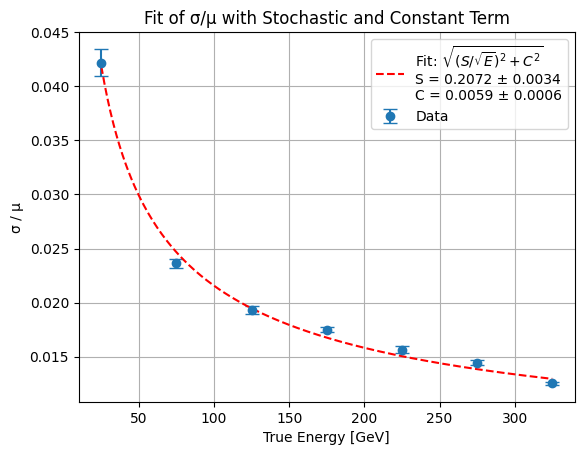

In [52]:
# Define fit function: sqrt( (S/sqrt(E))^2 + C^2 )
def resolution_model(E, S, C):
    return np.sqrt((S / np.sqrt(E))**2 + C**2)

# Initial guess: S = 0.3, C = 0.01
popt, pcov = curve_fit(resolution_model, bin_centers, sigma_over_mu,
                       sigma=sigma_over_mu_err, p0=[0.3, 0.01], absolute_sigma=True)

S_fit, C_fit = popt
S_err, C_err = np.sqrt(np.diag(pcov))

# Print results
print(f"Stochastic term (S): {S_fit:.4f} ± {S_err:.4f}")
print(f"Constant term (C):   {C_fit:.4f} ± {C_err:.4f}")

# Plot the fit over the data
E_plot = np.linspace(min(bin_centers), max(bin_centers), 300)
fit_curve = resolution_model(E_plot, S_fit, C_fit)

plt.errorbar(bin_centers, sigma_over_mu, yerr=sigma_over_mu_err, fmt='o', capsize=5, label='Data')
plt.plot(E_plot, fit_curve, 'r--', label=f'Fit: $\\sqrt{{(S/\\sqrt{{E}})^2 + C^2}}$\nS = {S_fit:.4f} ± {S_err:.4f}\nC = {C_fit:.4f} ± {C_err:.4f}')
plt.xlabel("True Energy [GeV]")
plt.ylabel("σ / μ")
plt.title("Fit of σ/μ with Stochastic and Constant Term")
plt.grid(True)
plt.legend()
plt.show()
